In [51]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('futuristic_city_traffic.csv')


In [52]:
df.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1219567 non-null  object 
 1   Vehicle Type           1219567 non-null  object 
 2   Weather                1219567 non-null  object 
 3   Economic Condition     1219567 non-null  object 
 4   Day Of Week            1219567 non-null  object 
 5   Hour Of Day            1219567 non-null  int64  
 6   Speed                  1219567 non-null  float64
 7   Is Peak Hour           1219567 non-null  int64  
 8   Random Event Occurred  1219567 non-null  int64  
 9   Energy Consumption     1219567 non-null  float64
 10  Traffic Density        1219567 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 102.4+ MB


# Grouping data by Hour of Day and calculating the average traffic density for each hour

In [54]:

traffic_flow = df.groupby('Hour Of Day')['Traffic Density'].mean()



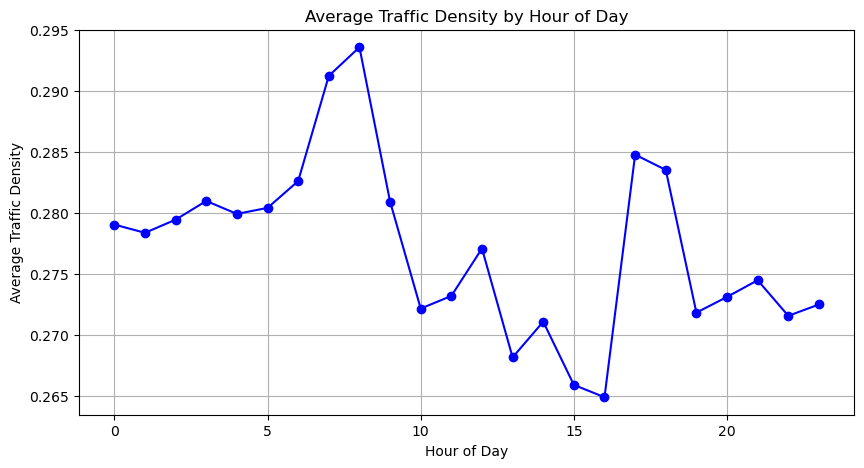

In [55]:
# Plotting
plt.figure(figsize=(10, 5))
traffic_flow.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Average Traffic Density by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Density')
plt.grid(True)
plt.show()

# Scatterplot of Energy Consumption vs. Traffic Density

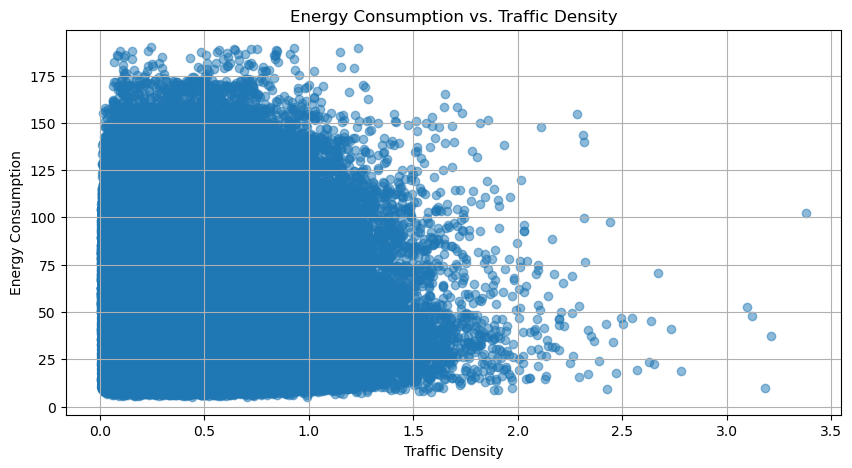

In [56]:

plt.figure(figsize=(10, 5))
plt.scatter(df['Traffic Density'], df['Energy Consumption'], alpha=0.5)
plt.title('Energy Consumption vs. Traffic Density')
plt.xlabel('Traffic Density')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()


# Convert Categorical Data to Numeric

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Convert categorical columns to numeric
df['City'] = le.fit_transform(df['City'])
df['Weather'] = le.fit_transform(df['Weather'])

# Now check the DataFrame's data types to confirm conversion
print(df.dtypes)


City                       int32
Vehicle Type              object
Weather                    int32
Economic Condition        object
Day Of Week               object
Hour Of Day                int64
Speed                    float64
Is Peak Hour               int64
Random Event Occurred      int64
Energy Consumption       float64
Traffic Density          float64
dtype: object


# Correlation matrix heatmap

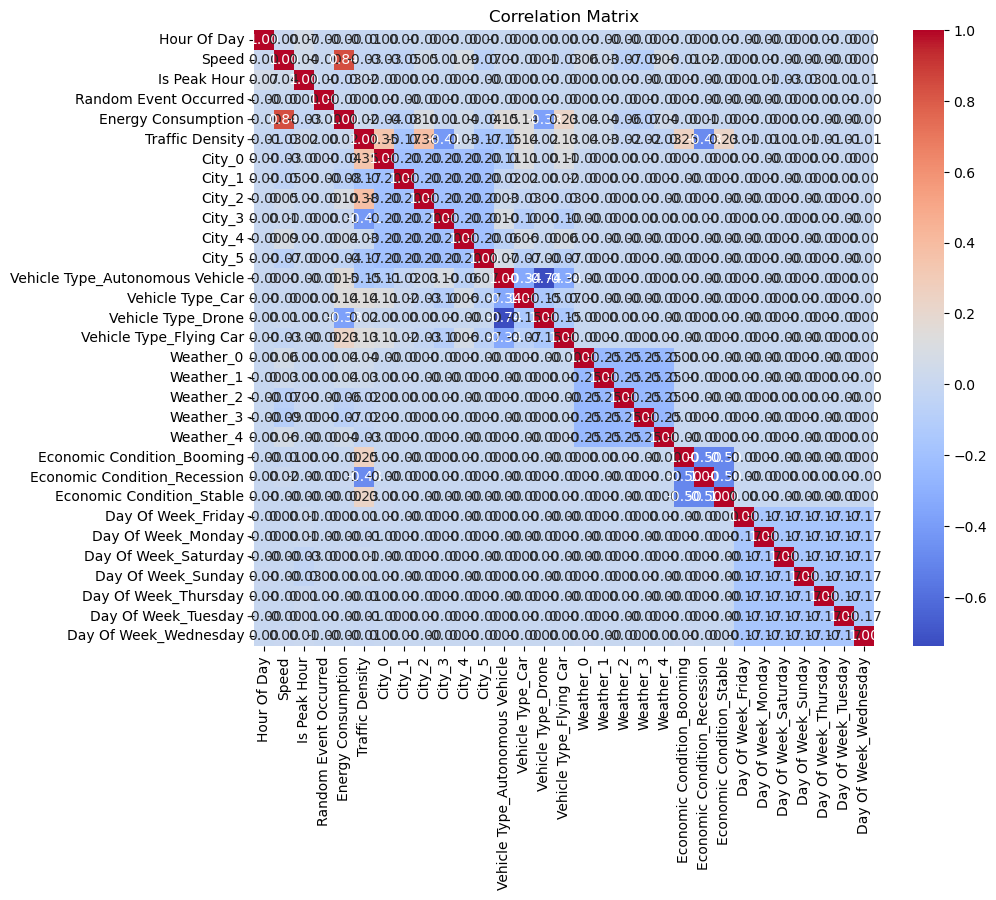

In [58]:
# onehot encode the columns
categorical_features = ['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week']
df = pd.get_dummies(df, columns=categorical_features)
df.head()


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()